# Week 8 Friday

## Announcements

* Videos due.  Relevant to next week's Worksheet 15.
* Next week's videos posted.  The last video, Evidence of Overfitting 2, might help you understand the U-shaped test error curve better.  The video quiz for that video is also a good sample question for next week's Canvas Quiz.
* No discussion section until the strike is resolved.
* Course project instructions have been added to the [course notes](https://christopherdavisuci.github.io/UCI-Math-10-F22/Proj/CourseProject.html).  A "warm-up" homework for the course project is Worksheet 16, posted in the Week 9 folder.
* Here is a reference for feature importance on [Towards Data Science](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3) if you want to see the mathematical details of how the feature importances are calculated.

## Canvas quiz for next week

* Based on the Decision Tree and U-shaped test error material (Worksheets 13 and 14 and this week's lectures).
* Counts as an in-class quiz.
* Multiple choice or numerical answer (you will probably need to use Python to answer one of the questions).
* Open book, open computer.
* Can communicate with other students about the questions.  (I'd rather not allow this, but I don't know how to enforce that.)
* Time limit of 30 minutes.
* Would you rather the quiz be taken between 4-5pm on Tuesday, or taken any time before Tuesday night?  Let me know by answering this [Ed Discussion poll](https://edstem.org/us/courses/28808/discussion/2182253) (the poll closes at 10:30am).

## Iris code from Wednesday

The only change I made was to use `X_train, X_test, y_train, y_test` instead of `df_train, df_test`.  This will save some typing later.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import altair as alt
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("iris")

In [3]:
cols = ["petal_length", "petal_width", "sepal_length"]
X = df[cols]
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

Use the following to visualize the data.  Last time we used `df_train` as our dataset, but that doesn't exist anymore.
```
alt.Chart(???).mark_circle(size=50, opacity=1).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(domain=["versicolor", "setosa", "virginica"])),
)
```

Here is a reminder of what information is in `X_train`.

In [4]:
X_train[:3]

petal_length  petal_width  sepal_length
126           4.8          1.8           6.2
23            1.7          0.5           5.1
64            3.6          1.3           5.6

Notice how `y_train` corresponds the same index values as `X_train`.

In [5]:
y_train[:3]

126     virginica
23         setosa
64     versicolor
Name: species, dtype: object

To plot this information using Altair, we need to have something that contains both the numeric values as well as the species value.  We could either concatenate `X_train` and `y_train`, or we could do the approach below, which is to take the same rows from `df` using `X_train.index`.

In [6]:
# Alternative pd.concat([X_train, y_train], axis=1)
df_train = df.loc[X_train.index]

Notice how the index of `df_train` begins the same.  (Slightly confusing: the columns are in a different order.  That's because my `cols` list changed the order of the columns.)

In [7]:
df_train[:3]

sepal_length  sepal_width  petal_length  petal_width     species
126           6.2          2.8           4.8          1.8   virginica
23            5.1          3.3           1.7          0.5      setosa
64            5.6          2.9           3.6          1.3  versicolor

The following doesn't work because `X_train` does not contain the "species" column.

In [8]:
alt.Chart(X_train).mark_circle(size=50, opacity=1).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(domain=["versicolor", "setosa", "virginica"])),
)

ValueError: species encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

Notice the three red virginica points in the right center.  Those three showed up in our computation from Wednesday, where we computed the probability of a flower being versicolor as 41/44; the difference 3/44 is those three points.

In [10]:
alt.Chart(df_train).mark_circle(size=50, opacity=1).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(domain=["versicolor", "setosa", "virginica"])),
)

alt.Chart(...)

Create an instance of a DecisionTreeClassifier and set `random_state=1`, then fit the classifier.

In [11]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1)

Fit the classifier to the training data.

In [12]:
clf.fit(X_train, y_train) # never fit using the test data

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1)

Illustrate the resulting tree using the following.
```
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)
```

In the following, we can see the same 3 number in the lower-left square.  (The classes are always ordered alphabetically, so in this case it goes, setosa, versicolor, virginica.)

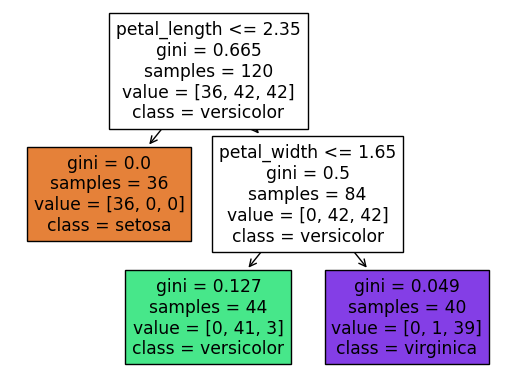

In [14]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

Here is a sample iris (definitely not from the actual dataset, because its petal width is negative) that we can evaluate the classifier on.

In [15]:
df_mini = pd.DataFrame([{"petal_length": 4, "petal_width": -5, "sepal_length": 3}])
df_mini

petal_length  petal_width  sepal_length
0             4           -5             3

In [16]:
clf.predict(df_mini)

array(['versicolor'], dtype=object)

In [17]:
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

For computing log loss below, it is not enough to know not just the class prediction, but also the predicted probabilities.  For example, we need to have a way to distinguish probabilities like `[0.34, 0.33, 0.33]` from `[1, 0, 0]`.  If we were just using `clf.predict`, rather than `clf.predict_proba`, we would not be able to differentiate these values.  

In [18]:
clf.predict_proba(df_mini)

array([[0.        , 0.93181818, 0.06818182]])

## The U-shaped test error curve

Most of the above material was review from Wednesday.  New material for Friday starts here.

We haven't used the test set so far.  Here we will.  We will use a loss function that is commonly used for classification problems, **log loss** (also called **cross entropy**).  If you want to see the mathematical description, I have it in the [Spring 2022 course notes](https://christopherdavisuci.github.io/UCI-Math-10-S22/Week9/Week9-Monday.html#a-loss-function-for-classification), but for us the most important thing is that lower values are better (as with Mean Squared Error and Mean Absolute Error) and that this is a loss function for classification (not for regression).

The `score` value is too coarse of an estimate.  (It is also not a "loss", because with `score`, bigger values are better, but for loss/cost/error functions, smaller values are better.)

This `score`, which records what proportion were correct, does not make sense for regression problems, because asking for our predicted real number to be exactly equal to the true real number is too extreme of a requirement.

In [19]:
clf.score(X_train, y_train)

0.9666666666666667

* Define two empty dictionaries, `train_dict` and `test_dict`.

For each integer value of `n` from `2` to `9` (inclusive), do the following. 
* Instantiate a new `DecisionTreeClassifier` using `max_leaf_nodes` as `n` and using `random_state=1`.
* Fit the classifier.
* Using `log_loss` from `sklearn.metrics`, evaluate the log loss (error) between `y_train` and the predicted probabilities.  (These two objects need to be input to `log_loss` in that order, with the true values first, followed by the predicted probabilities.)  Put this error as a value into the `train_dict` dictionary with the key `n`.
* Do the same thing with the test set.

In [20]:
from sklearn.metrics import log_loss

As `n` increases, the decision tree model becomes more flexible (more complex), and there is more risk of overfitting.

In [21]:
train_dict = {}
test_dict = {}

for n in range(2,10):
    clf = DecisionTreeClassifier(max_leaf_nodes=n, random_state=1)
    clf.fit(X_train, y_train)
    train_error = log_loss(y_train, clf.predict_proba(X_train))
    train_dict[n] = train_error
    test_error = log_loss(y_test, clf.predict_proba(X_test))
    test_dict[n] = test_error

Notice how the following values are decreasing.  That is typical: as the model becomes more flexible, the train error decreases.  (That is guaranteed with something like Mean Squared Error for regression, provided the model was fit using Mean Squared Error.  It is not guaranteed with log loss in this case, because log loss is not used directly when fitting the classifier.  But I don't think I've ever seen an example where the log loss increases as the model becomes more flexible.)

In [21]:
train_dict

{2: 0.48520302639196294,
 3: 0.13023605214186612,
 4: 0.05771345453313897,
 5: 0.038968949712512066,
 6: 0.018744504820629018,
 7: 0.011552453009334511,
 8: 2.1094237467877998e-15,
 9: 2.1094237467877998e-15}

With the test error, the situation is very different.  The test error will typically decrease at first, but then it will usually eventually start increasing.  The model performs worse on new data as the model starts to overfit the training data.  This shape of decreasing error followed by increasing error is what leads to the characteristic U-shaped test error curve.  (See the Wednesday notes for an illustration, or see the end result of Worksheet 14, or see the "Evidence of overfitting 2" video from next week.)

In [22]:
test_dict

{2: 0.36967849629863886,
 3: 0.23486681419172778,
 4: 0.13845953941519323,
 5: 1.2801626834971565,
 6: 2.3025850929940472,
 7: 2.3025850929940472,
 8: 2.3025850929940472,
 9: 2.3025850929940472}

* How do the values in `train_dict` and `test_dict` compare?
* At what point does the classifier seem to begin overfitting the data?

In this particular case, the overfitting seems to begin when we reach 5 leaf nodes.

In [23]:
clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=1)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=1)

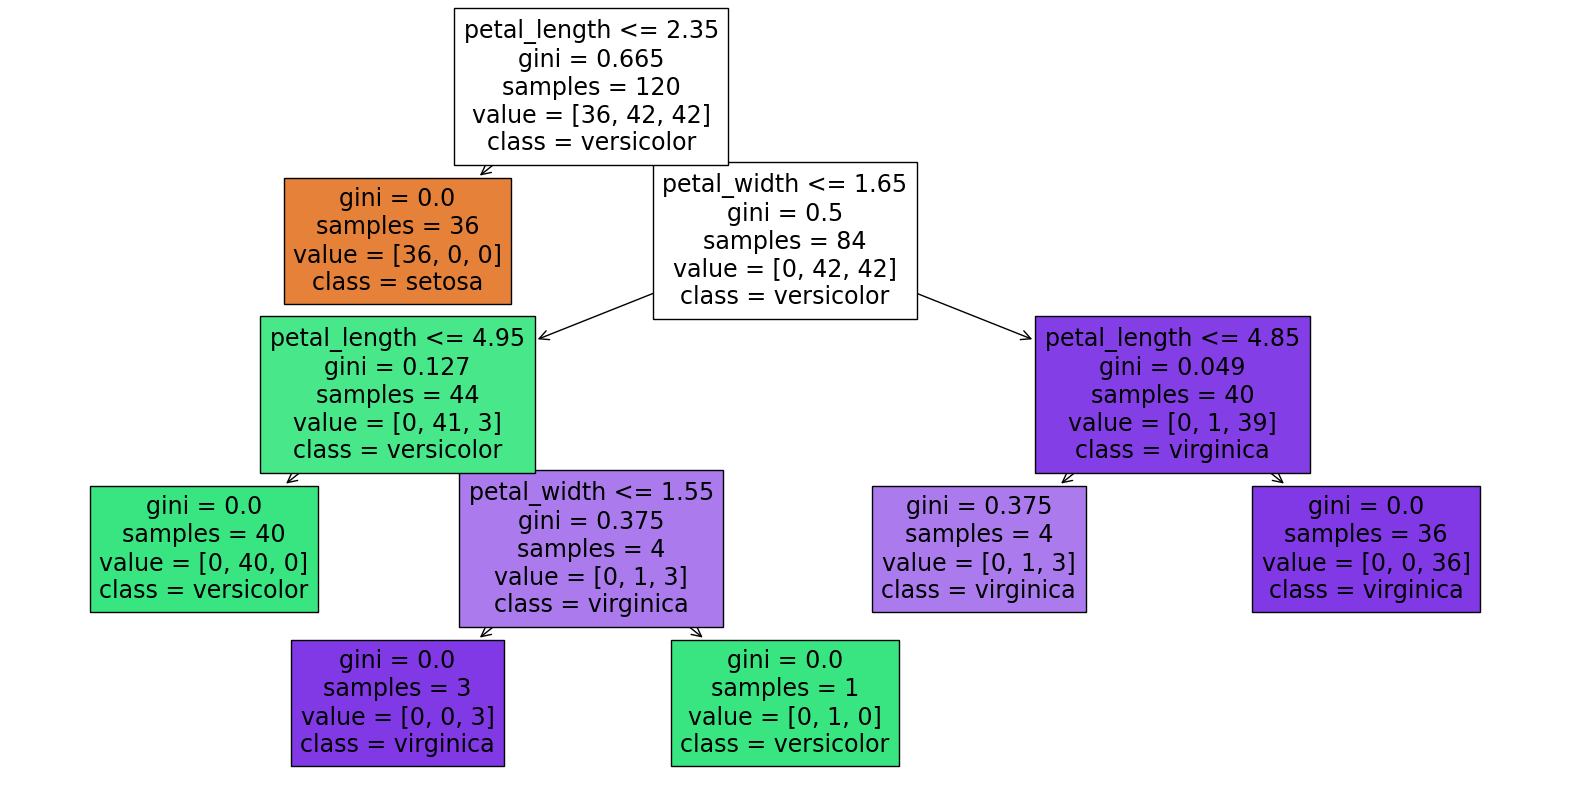

In [25]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

Notice in the above diagram how there is only one section which is not "perfect", the `[0, 1, 3]` section near the bottom right.  (Perfect means the region contains only one species of iris.)  So if we add another leaf node, that is where it will occur.

In [26]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, random_state=1)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=1)

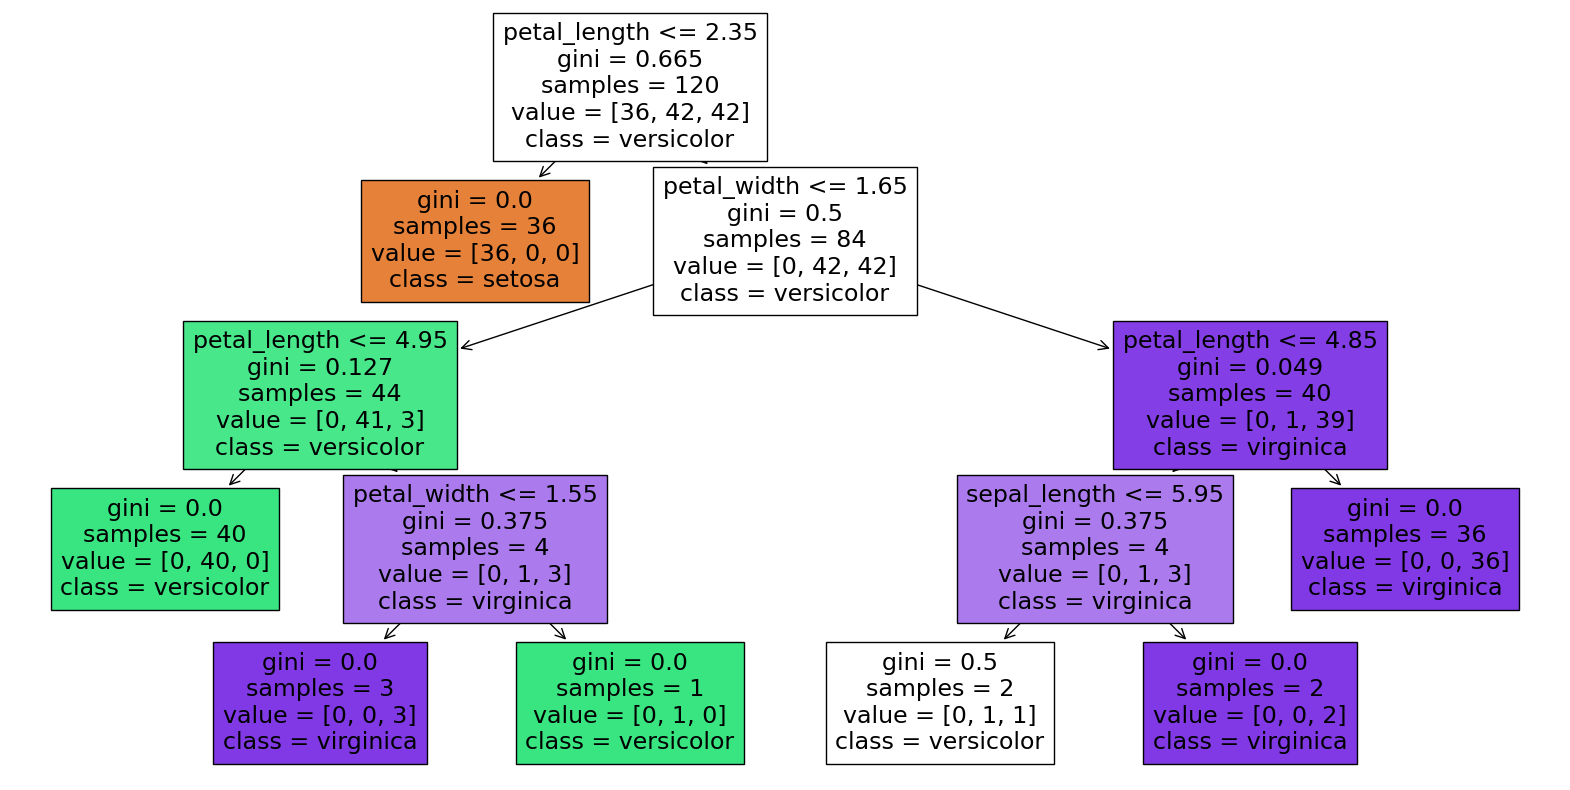

In [28]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

The above is also the first time we have seen the "sepal_length" column get used.  It is far less important in this model than the other two features we used, and that is reflected in the `feature_importances_` attribute.

Even if you're not so interested in flowers, when you try making this sort of computation with a dataset you're more interested in, it can be very interesting to see what the most important columns are.

In [29]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_)

petal_length    0.537321
petal_width     0.456334
sepal_length    0.006345
dtype: float64

In this last part, we quickly raced through an example of plotting the different prediction regions for this 7-leaf model.

In [30]:
rng = np.random.default_rng(seed=0)

The following will correspond to 5000 irises.  We have three columns because `clf` was fit using three features.

In [31]:
arr = rng.random(size=(5000, 3))

The values in `arr` are currently between 0 and 1.  We rescale two of the columns to correspond to possible values of petal length and petal width.  We set the sepal length column to be the constant value 10.  (Our Altair chart will not directly show sepal length, so we want the sepal length to be the same for all 5000 flowers.)

In [32]:
arr[:,0] *= 7
arr[:,1] *= 2.5
arr[:,2] = 10

We now convert `arr` to a pandas DataFrame and give it the appropriate column names.

In [33]:
df_art = pd.DataFrame(arr, columns=clf.feature_names_in_)

We also need a "species" value for each flower.  We get this using `clf.predict`.  Note: It is a little risky to have `df_art` on both the left and right side in the following cell.  If we evaluate it twice, it will break.  If I had been going more slowly, I would have done the following, which is safer.

```
df_art["species"] = clf.predict(df_art[cols])
```

In [34]:
df_art["species"] = clf.predict(df_art)

The following picture looks a little strange.  The more complicated these boundaries, the more likely we are to be overfitting the data.

In [35]:
alt.Chart(df_art).mark_circle(size=50, opacity=1).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(domain=["versicolor", "setosa", "virginica"])),
)

alt.Chart(...)